# Homework 3 (Scraping)

In [191]:
from bs4 import BeautifulSoup as bs
import requests
from lxml import html
import csv
import pandas as pd
import datetime
import time

url = "https://news.ycombinator.com/news?p="

for page in range(1,6):
    html_content = requests.get(url + str(page)).text
    soup = bs(html_content, 'html.parser')
    mytext = 'hn' + str(page) + '.html'
    with open(mytext, "w", encoding='utf-8') as hackerFile:
        hackerFile.write(str(soup))
    time.sleep(2)

In [193]:

rank_list = []
title_list = []
title_length_list = []
age_list = []
point_list = []
comments_list = []
urlList = ['hn1.html','hn2.html','hn3.html','hn4.html','hn5.html']

for url in urlList:
    with open(url, 'r') as f:

        contents = f.read()

        soup = bs(contents, 'html')

        ranks = soup.find_all('span',attrs={'class','rank'})
        for rank in ranks:
            tx = rank.text
            rank_list.append(int(tx.rstrip('.')));

        titles = soup.find_all('a',attrs={'class','storylink'})
        for title in titles:
            tl = len(title.text)
            title_list.append(title.text)
            title_length_list.append(tl)

        ages = soup.find_all('span',attrs={'class','age'})
        for age in ages:
            age_search = age.find('a').text
            age_aray = age_search.split();
            if(age_aray[1] == 'minutes'):
                hours = (int(age_aray[0]) / 60)
                age_list.append(hours)
            if(age_aray[1] == 'days' or age_aray[1] == 'day'):
                hours = (int(age_aray[0]) * 24)
                age_list.append(hours)
            if(age_aray[1] == 'hours' or age_aray[1] == 'hour'):
                hours = int(age_aray[0])
                age_list.append(hours)

        # print(len(age_list))


In [195]:
urlList = ['hn1.html','hn2.html','hn3.html','hn4.html','hn5.html']
for url in urlList:
    with open(url, 'r') as f:

        contents = f.read()

        soup = bs(contents, 'html')

        subtext = soup.find_all('td',attrs={'class','subtext'})

        for sub in subtext:
            if(sub.find("span", class_="score")):
                score_txt = sub.find('span', {'class','score'}).text
                point_list.append(int(score_txt.rstrip(' points')))
            else:
                # print('zero points*****')
                point_list.append(0)

        for sub in subtext:
            if(sub.find("a", text='hide')):
                comment_span = sub.find("a", text='hide').next_sibling.next_sibling
                print(comment_span)
                if(comment_span != None):
                    ct = comment_span.text
                    if(ct == 'discuss'):
                        comments_list.append(0)
                    else:
                        ctsplit = ct.split()
                        comments_list.append(int(ctsplit[0]))
                else:
                    # print("**********here")
                    comments_list.append(0)
            
            else:
                print("****not found")
        # print(point_list)
        # print(comments_list)

<a href="item?id=27463725">75 comments</a>
<a href="item?id=27459712">312 comments</a>
<a href="item?id=27463794">68 comments</a>
<a href="item?id=27465287">8 comments</a>
<a href="item?id=27464907">23 comments</a>
<a href="item?id=27448240">86 comments</a>
<a href="item?id=27462263">349 comments</a>
<a href="item?id=27465572">14 comments</a>
None
<a href="item?id=27460887">142 comments</a>
<a href="item?id=27466134">discuss</a>
<a href="item?id=27465481">15 comments</a>
<a href="item?id=27462200">84 comments</a>
<a href="item?id=27466374">1 comment</a>
<a href="item?id=27461564">24 comments</a>
<a href="item?id=27466151">discuss</a>
<a href="item?id=27464445">3 comments</a>
<a href="item?id=27461970">127 comments</a>
<a href="item?id=27454070">discuss</a>
<a href="item?id=27465837">1 comment</a>
<a href="item?id=27460022">34 comments</a>
<a href="item?id=27462194">14 comments</a>
<a href="item?id=27458555">108 comments</a>
<a href="item?id=27458785">238 comments</a>
<a href="item?id=2

In [196]:
print(len(rank_list))
print(len(title_list))
print(len(title_length_list))
print(len(age_list))
print(len(point_list))
print(len(comments_list))

df = pd.DataFrame({"Rank": rank_list, "Title": title_list, "Title_Length": title_length_list, "Age": age_list, "Points": point_list, "Comments": comments_list})


150
150
150
150
150
150


## Part 2

In [197]:
# {"Rank": rank_list, "Title": title_list, "Title_Length": title_length_list, "Age": age_list, "Points": point_list, "Comments": comments_list}
import statsmodels.api as sm
import statsmodels.formula.api as smf
df.dtypes
datA = smf.ols(formula="Rank ~ Title_Length", data=df).fit()
datA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.01496
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.903
Time:                        16:21:15   Log-Likelihood:                -778.06
No. Observations:                 150   AIC:                             1560.
Df Residuals:                     148   BIC:                             1566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.6026      9.691      7.904      0.000      57.452      95.753
Title_Length    -0.0222      0.182     -0.122      0.903      -0.381       0.337
==============================================================================
Omnibus:                       59.948   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.946
Skew:                          -0.005   Prob(JB):                       0.0114
Kurtosis:                       1.804   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
datB = smf.ols(formula="Rank ~ Points", data=df).fit()
datB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7420
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.390
Time:                        16:21:17   Log-Likelihood:                -777.69
No. Observations:                 150   AIC:                             1559.
Df Residuals:                     148   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6462      4.337     17.901      0.000      69.075      86.218
Points        -0.0172      0.020     -0.861      0.390      -0.057       0.022
==============================================================================
Omnibus:                       67.962   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.312
Skew:                          -0.017   Prob(JB):                      0.00950
Kurtosis:                       1.780   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
datC = smf.ols(formula="Rank ~ Comments + Points", data=df).fit()
datC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4850
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.617
Time:                        16:21:18   Log-Likelihood:                -777.57
No. Observations:                 150   AIC:                             1561.
Df Residuals:                     147   BIC:                             1570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.8208      4.364     17.833      0.000      69.197      86.445
Comments      -0.0247      0.051     -0.482      0.631      -0.126       0.077
Points        -0.0040      0.034     -0.117      0.907      -0.071       0.063
==============================================================================
Omnibus:                       69.042   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.360
Skew:                          -0.021   Prob(JB):                      0.00928
Kurtosis:                       1.777   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
datD = smf.ols(formula="Rank ~ Age", data=df).fit()
datD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     39.69
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.22e-09
Time:                        16:21:19   Log-Likelihood:                -760.24
No. Observations:                 150   AIC:                             1524.
Df Residuals:                     148   BIC:                             1531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.8011      4.793     11.017      0.000      43.330      62.272
Age            1.9674      0.312      6.300      0.000       1.350       2.584
==============================================================================
Omnibus:                       21.969   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.452
Skew:                           0.256   Prob(JB):                       0.0241
Kurtosis:                       2.036   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<AxesSubplot:xlabel='Rank', ylabel='Rank'>,
        <AxesSubplot:xlabel='Title_Length', ylabel='Rank'>,
        <AxesSubplot:xlabel='Age', ylabel='Rank'>,
        <AxesSubplot:xlabel='Points', ylabel='Rank'>,
        <AxesSubplot:xlabel='Comments', ylabel='Rank'>],
       [<AxesSubplot:xlabel='Rank', ylabel='Title_Length'>,
        <AxesSubplot:xlabel='Title_Length', ylabel='Title_Length'>,
        <AxesSubplot:xlabel='Age', ylabel='Title_Length'>,
        <AxesSubplot:xlabel='Points', ylabel='Title_Length'>,
        <AxesSubplot:xlabel='Comments', ylabel='Title_Length'>],
       [<AxesSubplot:xlabel='Rank', ylabel='Age'>,
        <AxesSubplot:xlabel='Title_Length', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Points', ylabel='Age'>,
        <AxesSubplot:xlabel='Comments', ylabel='Age'>],
       [<AxesSubplot:xlabel='Rank', ylabel='Points'>,
        <AxesSubplot:xlabel='Title_Length', ylabel='Points'>,
        <AxesSubplot:xlabel

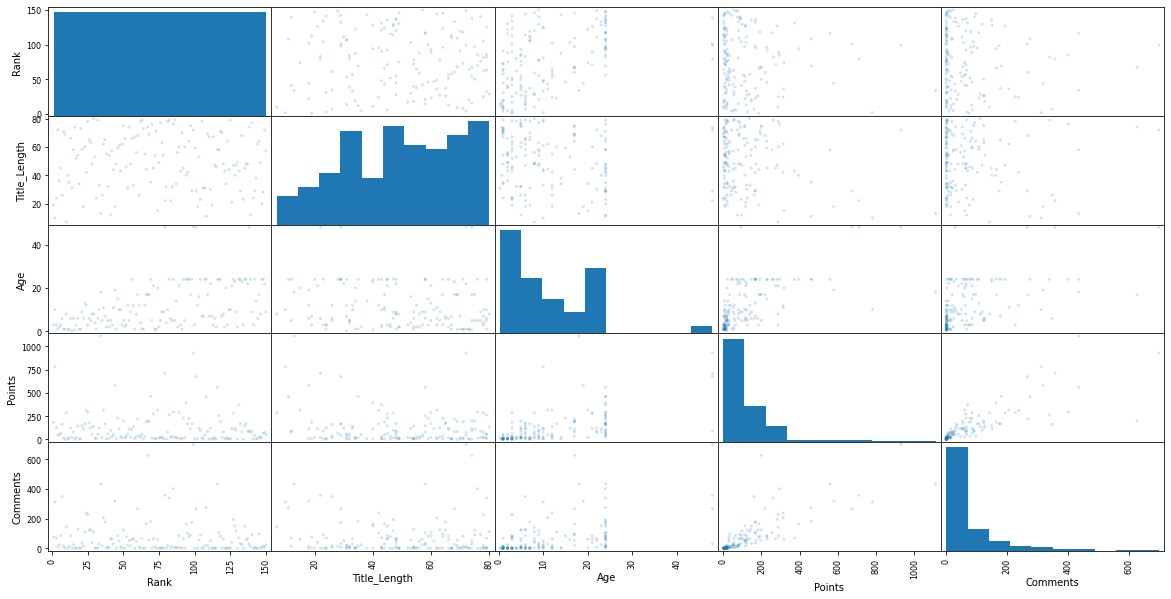

In [201]:
# {"Rank": rank_list, "Title": title_list, "Title_Length": title_length_list, "Age": age_list, "Points": point_list, "Comments": comments_list}

pd.plotting.scatter_matrix(df[['Rank', 'Title_Length', 'Age', 'Points', 'Comments']], alpha=0.2, figsize=(20, 10))

### Conclusions (subject to change when rescrapping)

`Rank/title Length .027`

`Rank/points .001`

`Rank/comments + points .014`

`Rank/age .154`


`Rank and age` seemed to have the highest r-squared value, though all were pretty low. My estimates would have been the `rank and points` or `rank and comments + points` would have yielded higher r-squared values. Both were the lowest. HW must be using something else to determine what climbs to the top.  `Rank and age` does make sense somewhat because the longer something is on the website the more time it has to climb.


`comments` and `points` seem to have a very slight linear relationship, at least around the beginning of the chart (see the scatter matrix above). otherwise there are no relationships noticable, including inverse linear

## Part 3

In [202]:
rank_pages_list = df['Rank']
front_list = []
for post in rank_pages_list:
    if(post < 31 ):
        front_list.append(1)
    else:
        front_list.append(0)

df['Front'] = front_list 
print(df)

     Rank  \
0    1      
1    2      
2    3      
3    4      
4    5      
5    6      
6    7      
7    8      
8    9      
9    10     
10   11     
11   12     
12   13     
13   14     
14   15     
15   16     
16   17     
17   18     
18   19     
19   20     
20   21     
21   22     
22   23     
23   24     
24   25     
25   26     
26   27     
27   28     
28   29     
29   30     
30   31     
31   32     
32   33     
33   34     
34   35     
35   36     
36   37     
37   38     
38   39     
39   40     
40   41     
41   42     
42   43     
43   44     
44   45     
45   46     
46   47     
47   48     
48   49     
49   50     
50   51     
51   52     
52   53     
53   54     
54   55     
55   56     
56   57     
57   58     
58   59     
59   60     
60   61     
61   62     
62   63     
63   64     
64   65     
65   66     
66   67     
67   68     
68   69     
69   70     
70   71     
71   72     
72   73     
73   74     
74   75     
75   76     

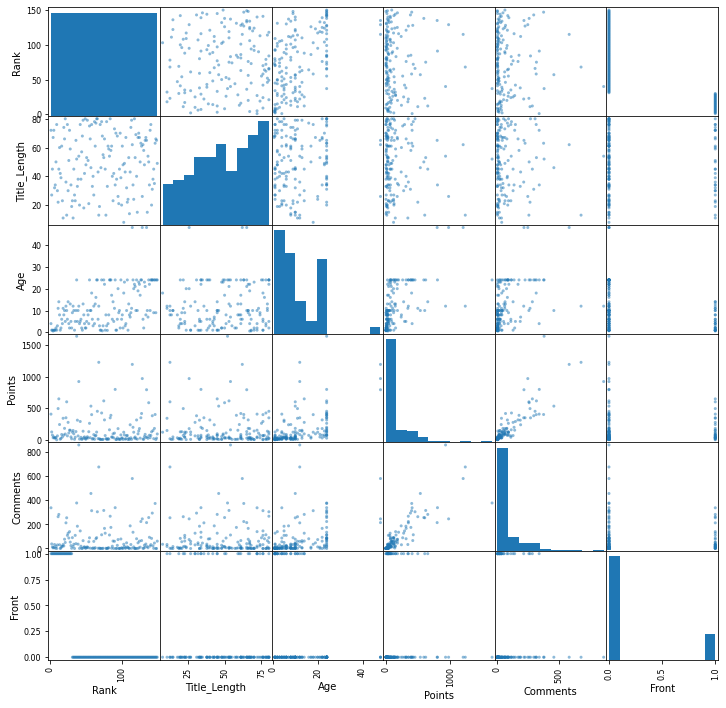

In [137]:
pd.plotting.scatter_matrix(df,figsize=(12, 12), diagonal='hist');
# print(df)

In [203]:
hn_title_model = smf.logit(formula="Front ~ Title_Length", data=df).fit()
hn_age_model = smf.logit(formula="Front ~ Age", data=df).fit()
hn_points_model = smf.logit(formula="Front ~ Points", data=df).fit()
hn_comments_model = smf.logit(formula="Front ~ Comments", data=df).fit()
hn_title_model.summary()

Optimization terminated successfully.
         Current function value: 0.500116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.410578
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.500396
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.500227
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Front   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:               0.0005730
Time:                        16:21:31   Log-Likelihood:                -75.017
converged:                       True   LL-Null:                       -75.060
Covariance Type:            nonrobust   LLR p-value:                    0.7693
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2361      0.547     -2.258      0.024      -2.309      -0.163
Title_Length    -0.0030      0.010     -0.294      0.769      -0.023       0.017
================================================================================
"""

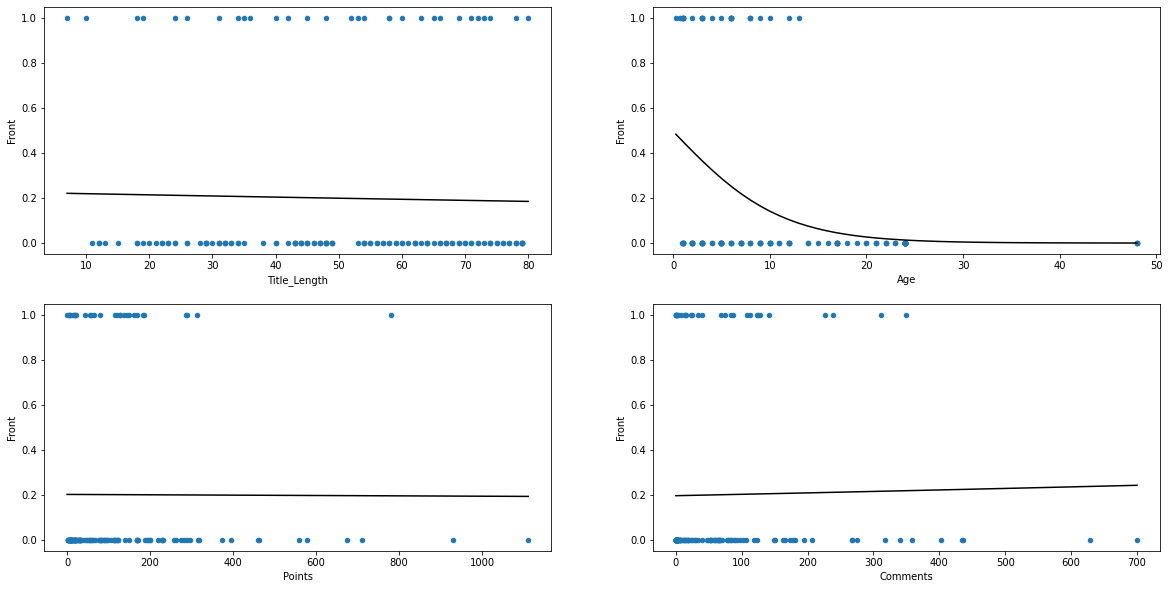

In [204]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[20, 10])


logistic = lambda x: 1/(1+np.exp(-x))
df.plot.scatter(x='Title_Length',y='Front', ax=ax[0,0])
df.plot.scatter(x='Age',y='Front', ax=ax[0,1])
df.plot.scatter(x='Points',y='Front', ax=ax[1,0])
df.plot.scatter(x='Comments',y='Front', ax=ax[1,1])

x1 = np.linspace(df['Title_Length'].min(),df['Title_Length'].max())
x2 = np.linspace(df['Age'].min(),df['Age'].max())
x3 = np.linspace(df['Points'].min(),df['Points'].max())
x4 = np.linspace(df['Comments'].min(),df['Comments'].max())

par = dict(hn_title_model.params)
par2 = dict(hn_age_model.params)
par3 = dict(hn_points_model.params)
par4 = dict(hn_comments_model.params)
ax[0,0].plot(x1,logistic(par['Intercept'] + par['Title_Length']*x1),color='Black');
ax[0,1].plot(x2,logistic(par2['Intercept'] + par2['Age']*x2),color='Black');
ax[1,0].plot(x3,logistic(par3['Intercept'] + par3['Points']*x3),color='Black');
ax[1,1].plot(x4,logistic(par4['Intercept'] + par4['Comments']*x4),color='Black');

### Conclusions

We looked at four variables compared to Rank:
- Title_Length
- Age (in hours)
- Points
- Comments

There was a slight downward curve for `Title_Length`, however, this is not enough to be of much use. Likewise, `Points` and `Comments` didn't show any useful curve. Only `Age` showed a curve at all. It would seem natural that the longer something is on, the less likely it's to persist at the top. 

[Investigating the web](https://medium.com/hacking-and-gonzo/how-hacker-news-ranking-algorithm-works-1d9b0cf2c08d), i found that the model for ranking that *Hacker News* used to use, is:

`> (= gravity* 1.8 timebase* 120 front-threshold* 1 nourl-factor* .4 lightweight-factor* .17 gag-factor* .1)

    (def frontpage-rank (s (o scorefn realscore) (o gravity gravity*))
      (* (/ (let base (- (scorefn s) 1)
              (if (> base 0) (expt base .8) base))
            (expt (/ (+ (item-age s) timebase*) 60) gravity))
         (if (no (in s!type 'story 'poll))  .8
             (blank s!url)                  nourl-factor*
             (mem 'bury s!keys)             .001
                                            (* (contro-factor s)
                                               (if (mem 'gag s!keys)
                                                    gag-factor*
                                                   (lightweight s)
                                                    lightweight-factor*
                                                   1)))))
                           
which is summarized as:

`Score = (P-1) / (T+2)^G
where,
P = points of an item (and -1 is to negate submitters vote)
T = time since submission (in hours)
G = Gravity, defaults to 1.8 in news.arc`

